In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

#file path
forest_path = "Data\\forest_data.csv"

#read csv file into dataframe
forest_csv = pd.read_csv(forest_path)

In [4]:
forest_csv

,forest_variable,continent,country,year,forest_unit,forest_powercode_code,forest_powercode,forest_value,forest_flags
0,Fellings,Oceania,Australia,1995,Cubic metres,3,Thousands,19560.000,NaN
1,Fellings,Oceania,Australia,2000,Cubic metres,3,Thousands,24407.727,NaN
2,Fellings,Oceania,Australia,2001,Cubic metres,3,Thousands,24474.000,NaN
3,Fellings,Oceania,Australia,2002,Cubic metres,3,Thousands,24296.000,NaN
4,Fellings,Oceania,Australia,2003,Cubic metres,3,Thousands,25819.000,NaN
...,...,...,...,...,...,...,...,...,...
2665,Intensity of use of forest resources,Europe,Iceland,2016,Ratio,0,Units,0.070,NaN
2666,Intensity of use of forest resources,Europe,Iceland,2017,Ratio,0,Units,0.093,NaN
2667,Intensity of use of forest resources,Europe,Iceland,2018,Ratio,0,Units,0.092,NaN
2668,Intensity of use of forest resources,Europe,Iceland,2019,Ratio,0,Units,0.033,NaN


In [6]:
# convert cubic meters to feet
def cubic_meters_to_cubic_feet(cubic_meters):
    cubic_feet = cubic_meters * 35.315
    return cubic_feet

# perform equation to conver
forest_csv['forest_value'] = forest_csv['forest_value'].apply(cubic_meters_to_cubic_feet)

# change word cubic metres to cubic feet
forest_csv['forest_unit'] = forest_csv['forest_unit'].str.replace('Cubic metres', 'Cubic Feet')

forest_csv

,forest_variable,continent,country,year,forest_unit,forest_powercode_code,forest_powercode,forest_value,forest_flags
0,Fellings,Oceania,Australia,1995,Cubic Feet,3,Thousands,2.439424e+07,NaN
1,Fellings,Oceania,Australia,2000,Cubic Feet,3,Thousands,3.044008e+07,NaN
2,Fellings,Oceania,Australia,2001,Cubic Feet,3,Thousands,3.052273e+07,NaN
3,Fellings,Oceania,Australia,2002,Cubic Feet,3,Thousands,3.030074e+07,NaN
4,Fellings,Oceania,Australia,2003,Cubic Feet,3,Thousands,3.220015e+07,NaN
...,...,...,...,...,...,...,...,...,...
2665,Intensity of use of forest resources,Europe,Iceland,2016,Ratio,0,Units,8.730045e+01,NaN
2666,Intensity of use of forest resources,Europe,Iceland,2017,Ratio,0,Units,1.159849e+02,NaN
2667,Intensity of use of forest resources,Europe,Iceland,2018,Ratio,0,Units,1.147377e+02,NaN
2668,Intensity of use of forest resources,Europe,Iceland,2019,Ratio,0,Units,4.115592e+01,NaN


In [9]:
df = forest_csv

#define time intervals in 10 year blocks
tenyears = [(1992, 2001), (2002, 2011), (2012, 2022)]

# create a function to calculate average over intervals
def calculate_10yr_avg(group):
    avg_ft = group['forest_value'].sum()
    return avg_ft

#create an empty dataframe to store results
results_list = []

#group data by continent and year interval and calculate the total gallons
for continent in df['continent'].unique():
    for interval in tenyears:
        start_year, end_year = interval
        mask = (df['continent'] == continent) & (df['year'] >= start_year) & (df['year'] <= end_year)
        group = df[mask]
        avg_ft = calculate_10yr_avg(group)
        results_list.append({'continent': continent, 'tenyears': f'{start_year}-{end_year}', 'avg_ft': avg_ft},)
        
#create dataframe after loop        
results = pd.DataFrame(results_list)
results = results.dropna()
#print
results

,continent,tenyears,avg_ft
0,Oceania,1992-2001,1.401905e+08
1,Oceania,2002-2011,3.946243e+08
2,Oceania,2012-2022,9.144718e+08
3,Europe,1992-2001,1.182710e+10
4,Europe,2002-2011,1.384146e+10
5,Europe,2012-2022,1.442439e+10
6,North America,1992-2001,1.035391e+10
7,North America,2002-2011,1.113106e+10
8,North America,2012-2022,5.972359e+09
12,Asia,1992-2001,8.917901e+08


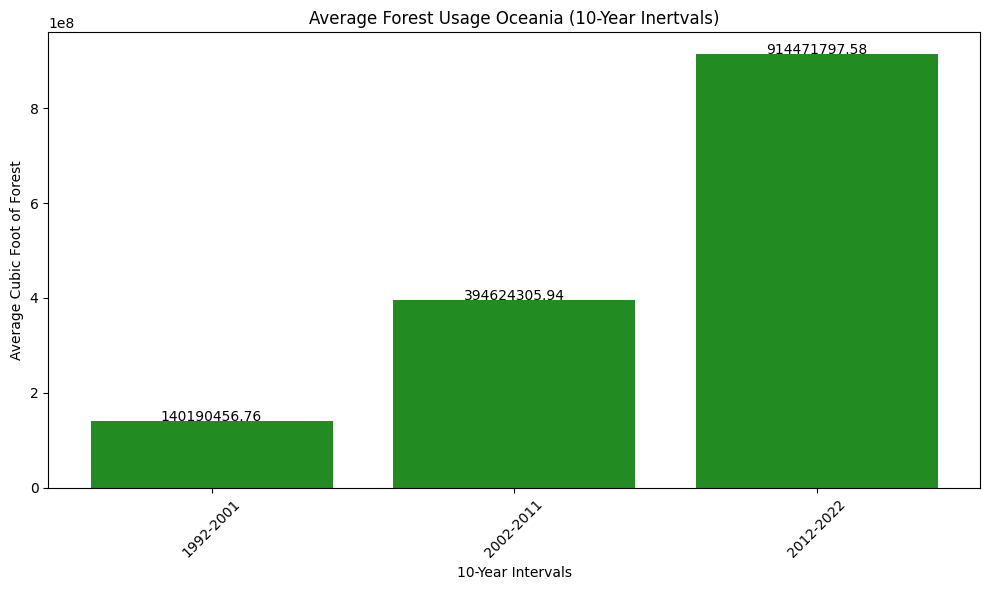

In [10]:
#filter data for africa
Oceania = results[results['continent'] == 'Oceania']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Oceania['tenyears'], Oceania['avg_ft'], color='forestgreen')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Cubic Foot of Forest')
plt.title('Average Forest Usage Oceania (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_ft in zip(bars, Oceania['avg_ft']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_ft:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

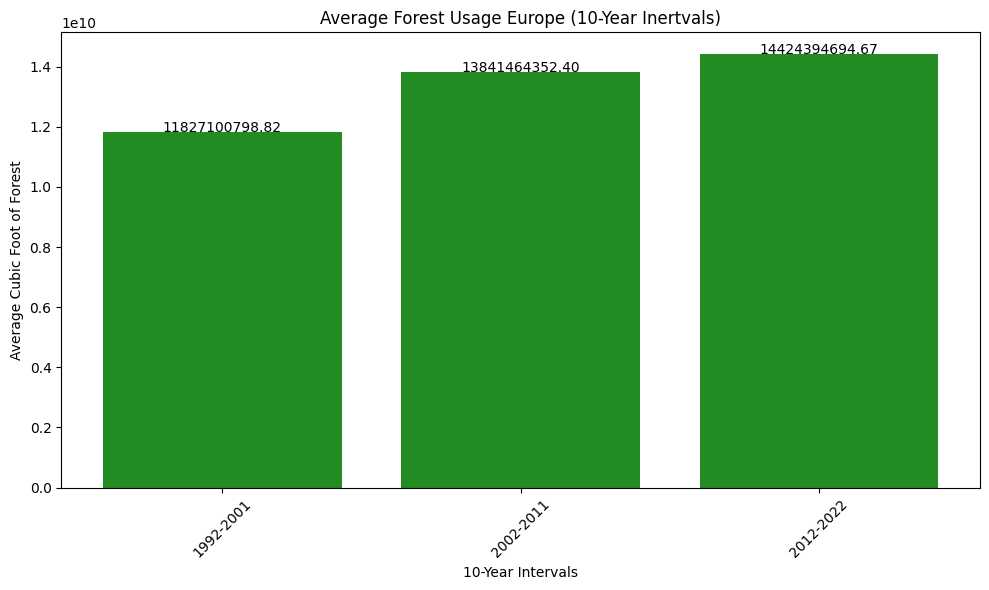

In [11]:
#filter data for africa
Europe = results[results['continent'] == 'Europe']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Europe['tenyears'], Europe['avg_ft'], color='forestgreen')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Cubic Foot of Forest')
plt.title('Average Forest Usage Europe (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_ft in zip(bars, Europe['avg_ft']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_ft:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

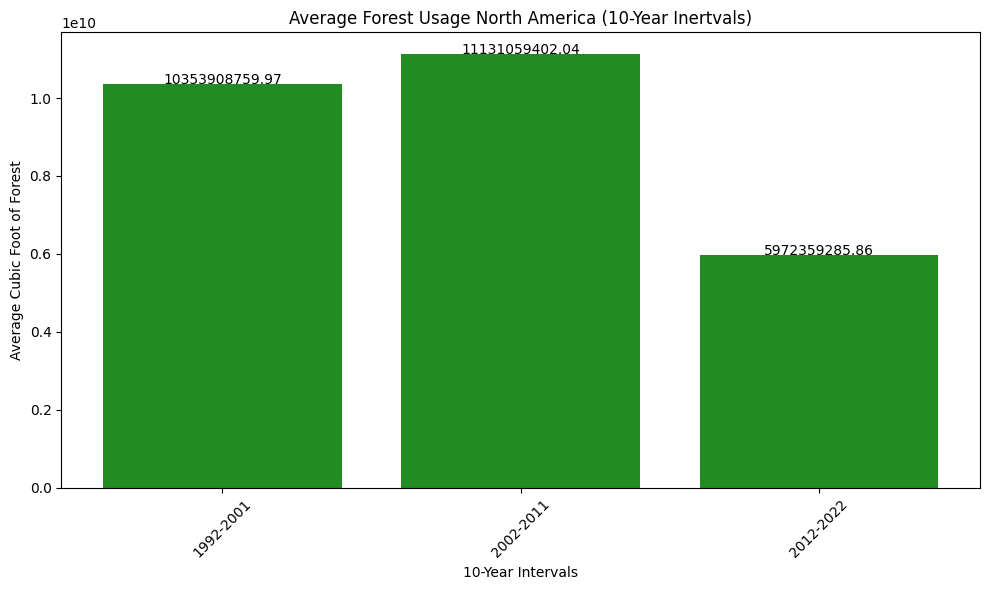

In [12]:
#filter data for africa
North_America = results[results['continent'] == 'North America']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(North_America['tenyears'], North_America['avg_ft'], color='forestgreen')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Cubic Foot of Forest')
plt.title('Average Forest Usage North America (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_ft in zip(bars, North_America['avg_ft']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_ft:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

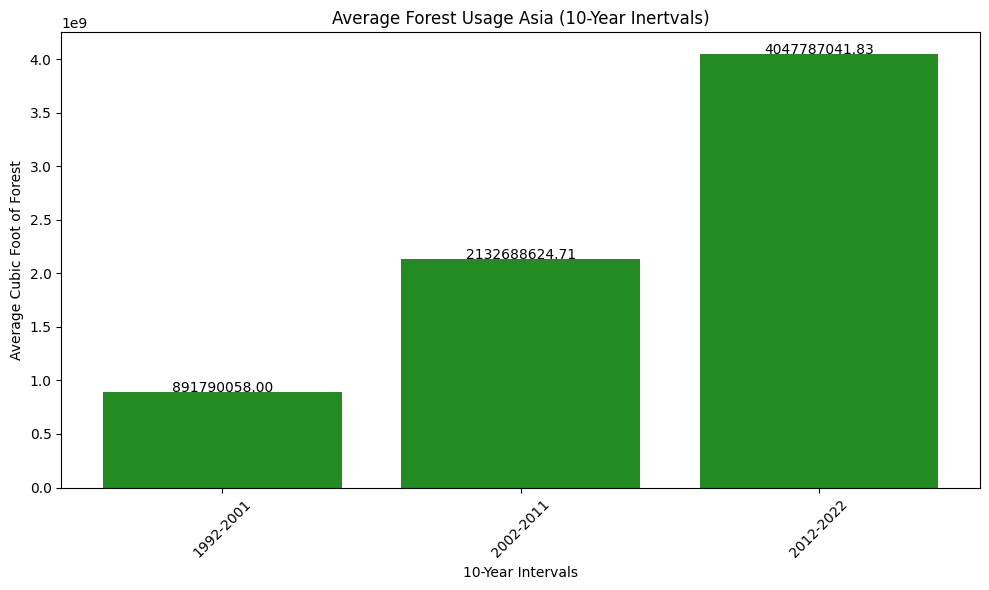

In [13]:
#filter data for africa
Asia = results[results['continent'] == 'Asia']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(Asia['tenyears'], Asia['avg_ft'], color='forestgreen')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Cubic Foot of Forest')
plt.title('Average Forest Usage Asia (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_ft in zip(bars, Asia['avg_ft']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_ft:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

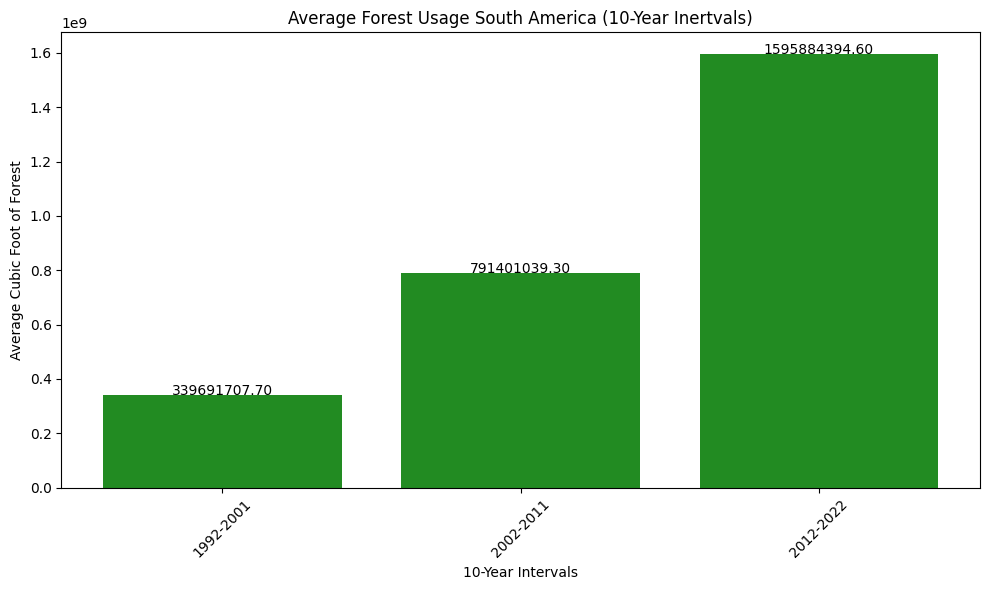

In [14]:
#filter data for africa
South_America = results[results['continent'] == 'South America']

#bar graph
plt.figure(figsize=(10,6))
bars = plt.bar(South_America['tenyears'], South_America['avg_ft'], color='forestgreen')
#labels and title
plt.xlabel('10-Year Intervals')
plt.ylabel('Average Cubic Foot of Forest')
plt.title('Average Forest Usage South America (10-Year Inertvals)')
#rotation
plt.xticks(rotation=45)

# include average gallon on top of each bar
for bar, avg_ft in zip(bars, South_America['avg_ft']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{avg_ft:.2f}', ha='center')
#display
plt.tight_layout()
plt.show()

In [19]:
#break down of each continent removing zeros
Oceania_df = forest_csv[forest_csv['continent'] == 'Oceania']
Oceania_df = Oceania_df.sort_values(by='year')
Oceania_df = Oceania_df[Oceania_df['forest_value'] != 0]


C:\Users\zombi\AppData\Local\Temp\ipykernel_13080\3446325357.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Oceania = Oceania_df[forest_csv['continent'] == 'Oceania']


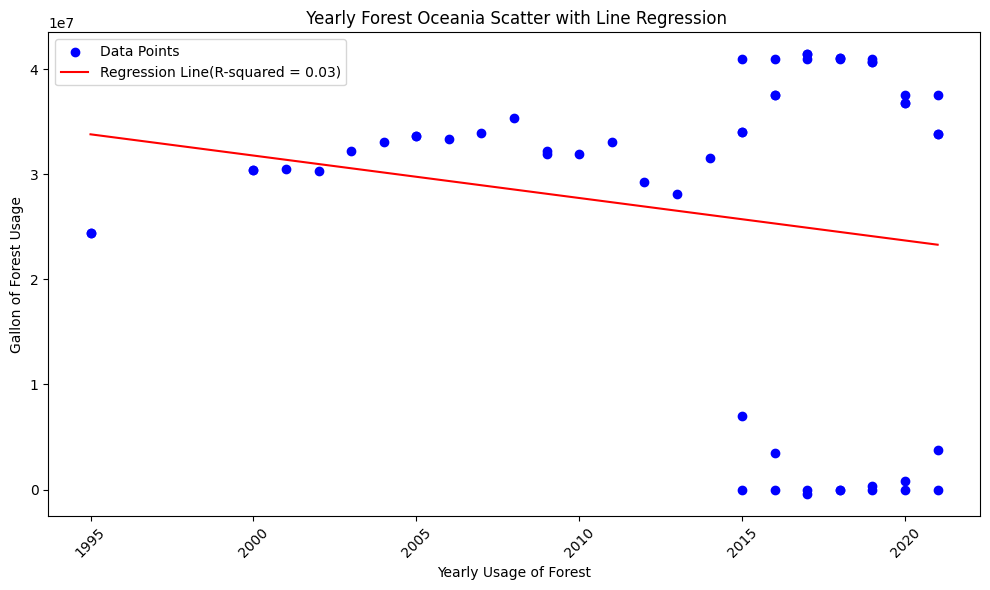

In [21]:
#filter data for Oceania
Oceania = Oceania_df[forest_csv['continent'] == 'Oceania']

#convert data frame columns to numpy arrays
x = np.array(Oceania['year'])
y = np.array(Oceania['forest_value'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of Forest')
plt.ylabel('Gallon of Forest Usage')
plt.title(' Yearly Forest Oceania Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#break down of each continent removing zeros
Europe_df = forest_csv[forest_csv['continent'] == 'Europe']
Europe_df = Europe_df.sort_values(by='year')
Europe_df = Europe_df[Europe_df['forest_value'] != 0]

C:\Users\zombi\AppData\Local\Temp\ipykernel_13080\1681234854.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Europe = Europe_df[forest_csv['continent'] == 'Europe']


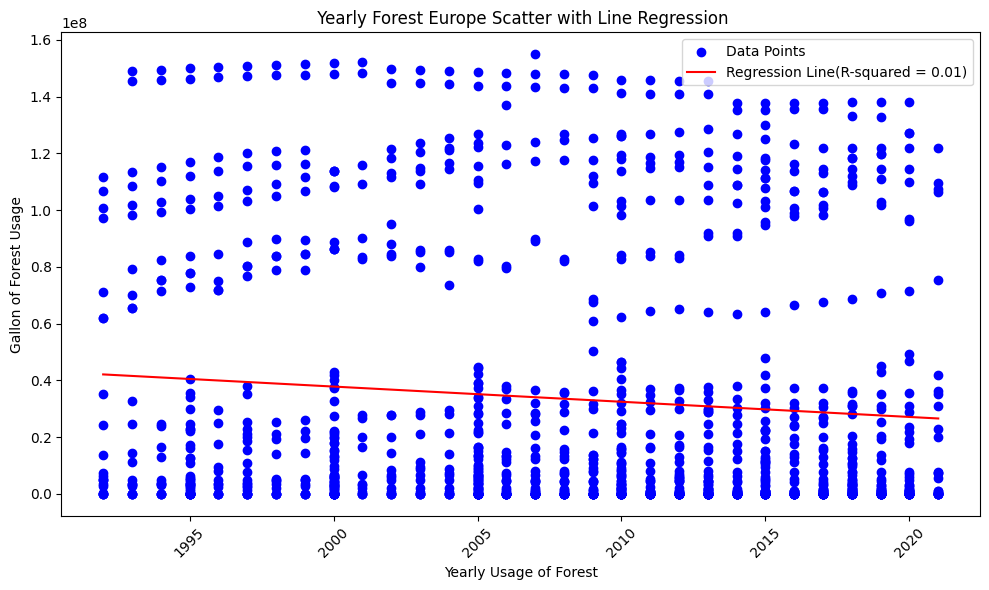

In [28]:
#filter data for Oceania
Europe = Europe_df[forest_csv['continent'] == 'Europe']

#convert data frame columns to numpy arrays
x = np.array(Europe['year'])
y = np.array(Europe['forest_value'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of Forest')
plt.ylabel('Gallon of Forest Usage')
plt.title(' Yearly Forest Europe Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
#break down of each continent removing zeros
North_America_df = forest_csv[forest_csv['continent'] == 'North America']
North_America_df = North_America_df.sort_values(by='year')
North_America_df = North_America_df[North_America_df['forest_value'] != 0]

C:\Users\zombi\AppData\Local\Temp\ipykernel_13080\3539596136.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  North_America = North_America_df[forest_csv['continent'] == 'North America']


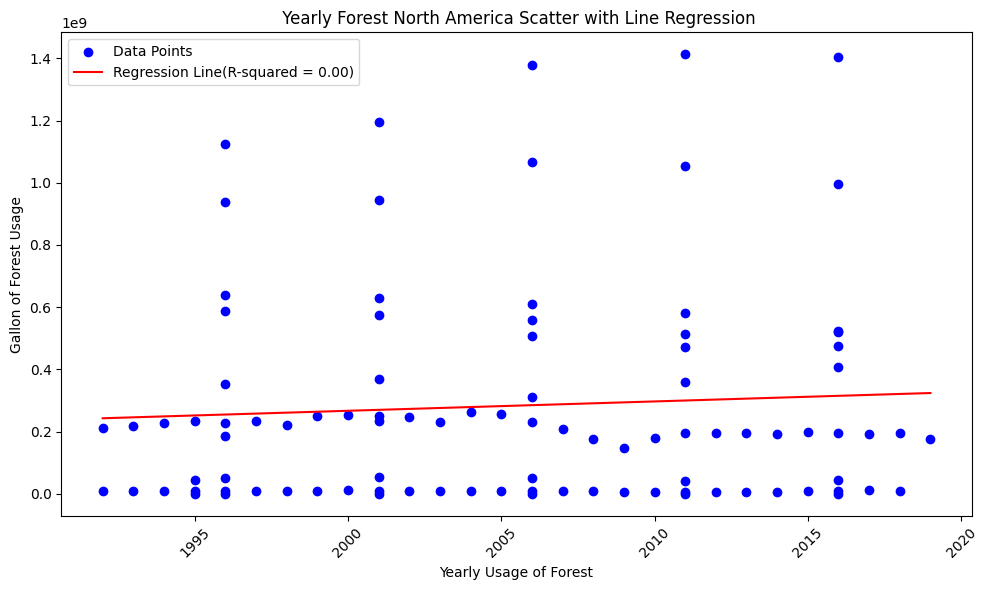

In [29]:
#filter data for Oceania
North_America = North_America_df[forest_csv['continent'] == 'North America']

#convert data frame columns to numpy arrays
x = np.array(North_America['year'])
y = np.array(North_America['forest_value'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of Forest')
plt.ylabel('Gallon of Forest Usage')
plt.title(' Yearly Forest North America Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
#break down of each continent removing zeros
South_America_df = forest_csv[forest_csv['continent'] == 'South America']
South_America_df = South_America_df.sort_values(by='year')
South_America_df = South_America_df[South_America_df['forest_value'] != 0]


C:\Users\zombi\AppData\Local\Temp\ipykernel_13080\277333225.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  South_America = South_America_df[forest_csv['continent'] == 'South America']


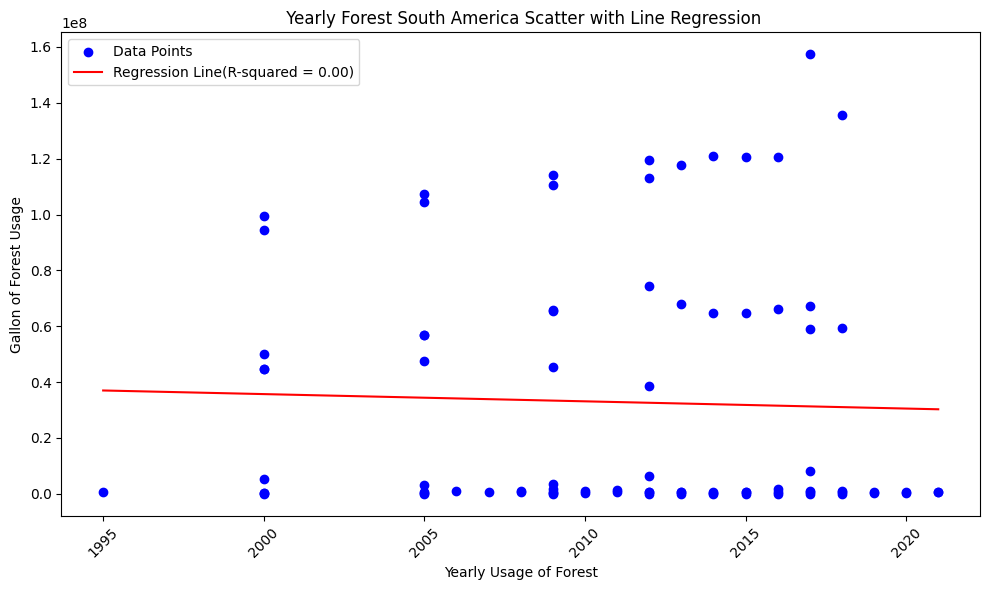

In [39]:
#filter data for Oceania
South_America = South_America_df[forest_csv['continent'] == 'South America']

#convert data frame columns to numpy arrays
x = np.array(South_America['year'])
y = np.array(South_America['forest_value'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of Forest')
plt.ylabel('Gallon of Forest Usage')
plt.title(' Yearly Forest South America Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
#break down of each continent removing zeros
Asia_df = forest_csv[forest_csv['continent'] == 'Asia']
Asia_df = Asia_df.sort_values(by='year')
Asia_df = Asia_df[Asia_df['forest_value'] != 0]


C:\Users\zombi\AppData\Local\Temp\ipykernel_13080\4130936098.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Asia = Asia_df[forest_csv['continent'] == 'Asia']


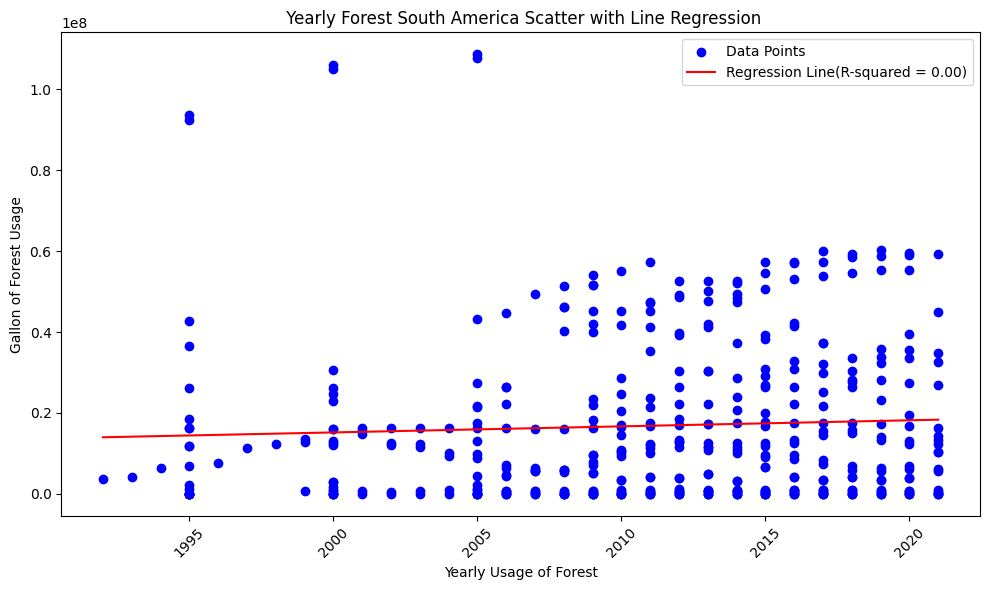

In [43]:
#filter data for Oceania
Asia = Asia_df[forest_csv['continent'] == 'Asia']

#convert data frame columns to numpy arrays
x = np.array(Asia['year'])
y = np.array(Asia['forest_value'])

#create scatter plot graph
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')

# calculate linerar regression params
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#create the regression line
regression_line = slope * x + intercept

#plot regression line
plt.plot(x, regression_line, color='red', label=f'Regression Line(R-squared = {r_value**2:,.2f})')

#labels and title
plt.xlabel('Yearly Usage of Forest')
plt.ylabel('Gallon of Forest Usage')
plt.title(' Yearly Forest South America Scatter with Line Regression')

#legend
plt.legend()

#display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()